In [ ]:
from qiskit import QuantumCircuit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit import quantum_info
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

import numpy as np
import matplotlib.pyplot as plt

### Error Probability

In [ ]:
backend_name = 'ibm_kyoto'
backend = QiskitRuntimeService().get_backend(backend_name)

noise_model = NoiseModel().from_backend(backend)

#### Error probabilities for X gate with initial state |0>

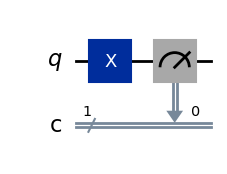

In [ ]:
circuit3_1 = QuantumCircuit(1,1)

circuit3_1.x(0)
circuit3_1.measure(0,0)

circuit3_1.draw('mpl')

shots:  5
shots:  505
shots:  1005
shots:  1505
shots:  2005
shots:  2505
shots:  3005
shots:  3505
shots:  4005
shots:  4505
shots:  5005
shots:  5505
shots:  6005
shots:  6505
shots:  7005
shots:  7505
shots:  8005
shots:  8505
shots:  9005
shots:  9505


Text(0, 0.5, 'error probability')

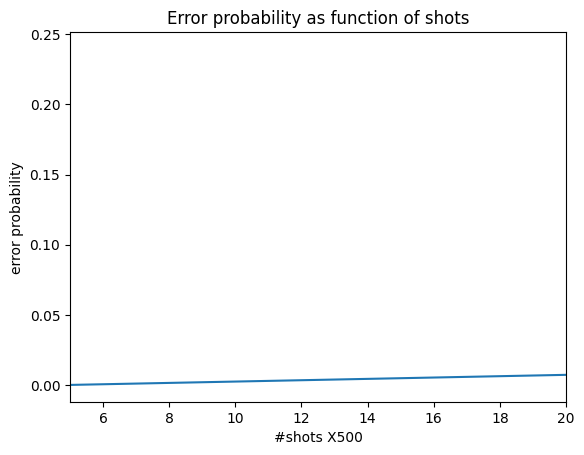

In [ ]:
sim_aer = AerSimulator()

ps_error = []
for shots in range(5, 10000, 500):
    print('shots: ', shots)
    # shots = 10000
    result = sim_aer.run(circuit3_1, shots=shots, noise_model=noise_model).result()
    counts = result.get_counts()
    p_error = counts['0']/shots if '0' in counts else 0
    ps_error.append(p_error)
# print('prob error: ', p_error)
# plot_histogram(counts)
plt.plot(range(5, 10000, 500), ps_error)
plt.xlim([5,20])
# plt.ylim([0,0.5])
plt.title('Error probability as function of shots')
plt.xlabel('#shots X500')
plt.ylabel('error probability')

#### Error probabilities for X gate with initial state |1>

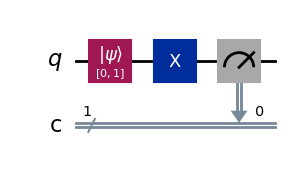

In [ ]:
circuit3_2 = QuantumCircuit(1,1)

ket0 = quantum_info.Statevector([0, 1])
circuit3_2.initialize(ket0)

circuit3_2.x(0)
circuit3_2.measure(0,0)

circuit3_2.draw('mpl')

shots:  5
shots:  505
shots:  1005
shots:  1505
shots:  2005
shots:  2505
shots:  3005
shots:  3505
shots:  4005
shots:  4505
shots:  5005
shots:  5505
shots:  6005
shots:  6505
shots:  7005
shots:  7505
shots:  8005
shots:  8505
shots:  9005
shots:  9505


Text(0, 0.5, 'error probability')

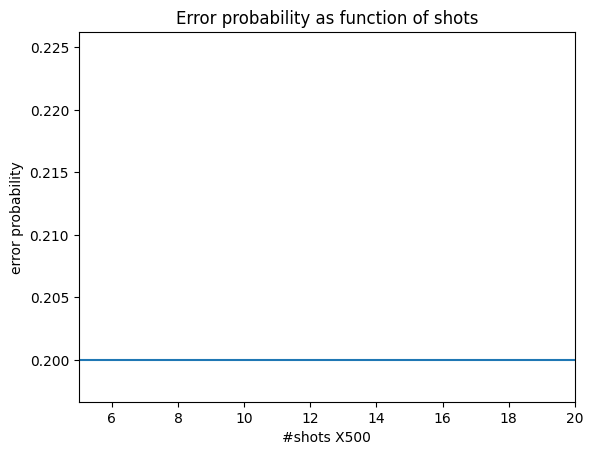

In [ ]:
sim_aer = AerSimulator()

ps_error = []
for shots in range(5, 10000, 500):
    print('shots: ', shots)
    # shots = 10000
    result = sim_aer.run(circuit3_2, shots=shots, noise_model=noise_model).result()
    counts = result.get_counts()
    p_error = counts['1']/shots if '1' in counts else 0
    ps_error.append(p_error)
# print('prob error: ', p_error)
# plot_histogram(counts)
plt.plot(range(5, 10000, 500), ps_error)
plt.xlim([5,20])
# plt.ylim([0,0.5])
plt.title('Error probability as function of shots')
plt.xlabel('#shots X500')
plt.ylabel('error probability')